# PROJET FOOTBALL MATCH PREDICTOR


Pour ce projet, nous avons comme devoir de prédire des résultats de matchs de football à venir (ou passés ) sur base des performances passées des équipes, et de leurs joueurs. 

Pour ce faire, on dispose d’une immense base de données de résultats de matches collectés durant 8 ans. Elle contient plus de 25000  matches et plus de 10000 joueurs.

Il est de notre devoir de fetcher,nettoyer, préparer les données mais aussi d'entrainer un modèle et d'évaluer ce modèle.

## Table des matières complète<a class="anchor" id="tableContents"></a>

* [Fetch Step](#fetch)
* [Cleaning Step](#clean)                        
* [Prepare Step](#prepare)                                                               
* [Train Model Step](#train_model)
* [Evaluate model Step](#evaluate_model)

## Table des matières raccourcie

* [Fetch/Cleaning/Prepare Workflow using Piplines](#pipelines)
* [Train Model Step](#train_model)
* [Evaluate model Step](#evaluate_model)




# 1) Fetch Step
 [Table des matières](#tableContents)

La première étape du projet est de **FETCHER** les données. 

Dans un premier temps, nous allons récupérer les données se trouvant sur Kaggle. La base de données est une base de donnée .sqlite . Nous avons utilisé un script permettant d'extraire les différentes tables de cette base de données sous forme CSV.

La deuxième étape étant d'observer les différentes features et d'extraire les corrélations des features entre elles.

### Nous récuperons les données à partir du fichier sqlite et on créeons un fichier csv distincts pour chaque table présente dans la base de donnéees

In [1]:
#IMPORTS
import sqlite3
import pandas as pd
#Enlever les warnings
import warnings
warnings.simplefilter("ignore")

#DATA FETCHING
dat = sqlite3.connect('../database/database.sqlite')

table = ["Country", "League", "X_Train", "X_Test","Player", "Player_Attributes",
         "Team", "Team_Attributes"]

for name in table:
    query = dat.execute("SELECT * From " + name)
    cols = [column[0] for column in query.description]
    results = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
    results.to_csv(r'../csv/'+name+'.csv')


### Transformation des fichiers csv en dataframes

In [2]:
matchsTrain = pd.read_csv('../csv/X_Train.csv')
matchsTest = pd.read_csv('../csv/X_Test.csv')
players = pd.read_csv('../csv/Player.csv')
teams = pd.read_csv('../csv/Team.csv')
team_attr = pd.read_csv('../csv/Team_Attributes.csv')
player_attr = pd.read_csv('../csv/Player_Attributes.csv')
countries = pd.read_csv('../csv/Country.csv')
leagues = pd.read_csv('../csv/League.csv')

## Exploration des données

#### Exploration du train set

Informations importantes à propos du training set: 
- les colonnes home/away_player_XY représentent les coordonnées des X,Y des joueurs sur le terrain
- les colonnes home/away_player_i où 1<i<11 représentent l'api id des joueurs

Informations sur les colonnes du dataframes comme le nombre d'éléments non null et le type de données de la colonne

In [3]:
matchsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 79 columns):
Unnamed: 0          20479 non-null int64
index               20479 non-null int64
id                  20479 non-null int64
country_id          20479 non-null int64
league_id           20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
match_api_id        20479 non-null int64
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
home_player_X1      19033 non-null float64
home_player_X2      19033 non-null float64
home_player_X3      19025 non-null float64
home_player_X4      19025 non-null float64
home_player_X5      19025 non-null float64
home_player_X6      19025 non-null float64
home_player_X7      19025 non-null float64
home_player_X8      19025 non-null float64
home_player_

Ici on peut voir des descriptions statistiques sur les colonnes du dataframe

In [4]:
matchsTrain.describe()

,Unnamed: 0,index,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,20479.000000,20479.000000,20479.0000,20479.000000,20479.000000,20479.000000,2.047900e+04,20479.000000,20479.000000,20479.000000,...,19460.000000,19439.000000,19448.000000,19425.000000,19430.000000,19498.000000,19409.000000,19433.000000,19348.000000,19264.000000
mean,10239.000000,10239.000000,13018.8497,11766.815177,11766.815177,18.224132,1.196640e+06,9903.388105,10035.218272,1.538454,...,107215.875231,91067.257729,94952.167935,109937.905071,102434.662120,98161.155247,110213.809418,110629.648948,106639.449245,105447.734064
std,5911.922417,5911.922417,7492.2651,7551.399825,7551.399825,10.398607,4.950166e+05,13529.090615,14554.860615,1.296081,...,113465.530366,101884.382600,103884.329333,112726.177016,111247.146676,107130.925346,117246.374813,116002.144951,112511.966589,110469.160375
min,0.000000,0.000000,2.0000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,...,2790.000000,2752.000000,2752.000000,2790.000000,2625.000000,2625.000000,2625.000000,2625.000000,2802.000000,2802.000000
25%,5119.500000,5119.500000,6540.5000,4769.000000,4769.000000,9.000000,7.684365e+05,8481.000000,8472.000000,1.000000,...,32574.000000,30464.000000,30617.000000,33579.000000,31058.000000,30930.000000,32836.000000,33421.000000,32572.000000,32748.000000
50%,10239.000000,10239.000000,13027.0000,10257.000000,10257.000000,18.000000,1.189713e+06,8697.000000,8696.000000,1.000000,...,42388.000000,39892.000000,41062.000000,46297.000000,41659.000000,41603.500000,46104.000000,45860.000000,45174.000000,43097.000000
75%,15358.500000,15358.500000,19485.5000,17642.000000,17642.000000,27.000000,1.709904e+06,9925.000000,9911.000000,2.000000,...,159854.000000,119007.000000,145561.000000,160243.000000,151079.000000,145538.000000,164031.000000,164089.000000,160194.000000,163205.000000
max,20478.000000,20478.000000,25979.0000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,...,748432.000000,705484.000000,728414.000000,746419.000000,722766.000000,750435.000000,717248.000000,722766.000000,722766.000000,726956.000000


On peut voir ici les 5 premières lignes du dataframe pour avoir une idée générale de celui-ci

In [5]:
matchsTrain.head()

,Unnamed: 0,index,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,0,0,11103,10257,10257,2010/2011,17,2010-12-19 00:00:00,888326,8533,...,231753.0,24235.0,41884.0,34320.0,31314.0,192574.0,27694.0,39232.0,30712.0,39540.0
1,1,1,16167,15722,15722,2009/2010,5,2009-08-29 00:00:00,673737,8245,...,13515.0,13533.0,69261.0,NaN,69599.0,NaN,NaN,NaN,NaN,NaN
2,2,2,11222,10257,10257,2010/2011,28,2011-03-06 00:00:00,888435,9882,...,150466.0,18500.0,25815.0,41380.0,39701.0,39264.0,73999.0,167634.0,39306.0,96598.0
3,3,3,11018,10257,10257,2010/2011,1,2010-08-29 00:00:00,888161,9976,...,27720.0,24235.0,41884.0,41892.0,31314.0,33888.0,41890.0,39232.0,30727.0,39540.0
4,4,4,25596,24558,24558,2013/2014,5,2013-08-10 00:00:00,1471657,9930,...,67349.0,16254.0,25815.0,25843.0,93223.0,113227.0,302079.0,30912.0,25860.0,71764.0


L'api id représente l'id sur lequel on pourra faire un "merge" du training set avec d'autres tables tels que Player Attributs, Team Attributs,...

### Conclusions : 
- En inspectant les premieres lignes du dataframe , on peut s'apercevoir que tous les matchs sont joués entre équipes d'un même championnat (pas de matchs internationaux ni championnat europeen). Nous n'allons donc pas utiliser les tables Country et League


## Injection des attributs des differentes tables dans le training set (Visualisation des correlations entre differents attributs des differentes tables)

### Ajout du label

Nous allons déterminer le label que l'on veut prédire par la suite. C'est à dire le résultat final du match (1: équipe à domicile gagne, 0 : égalité, -1 : équipe à l'extérieur gagne)

In [6]:
def det_label(score1, score2):
    if(score1 == score2):
        return 0
    if(score1 < score2):
        return -1
    else:
        return 1


In [7]:
#On va travailler sur une copie du training set
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
    row['home_team_goal'], row['away_team_goal']), axis=1)

In [8]:
#Nous supprimons les scores car ils nous plus utils
matchsTrainCopy = matchsTrainCopy.drop(['away_team_goal', 'home_team_goal'], axis=1)

Nous allons voir la dispersion de nos valeurs pour le label

In [9]:
matchsTrainCopy['label'].value_counts()

 1    9367
-1    5939
 0    5173
Name: label, dtype: int64

Nous pouvons voir que l'équipe jouant à domicile gagne dans un peu moins de 50% des cas

### Exploration des attributes des équipes

Pour mieux visualiser les attributs liés aux équipes nous allons drop les attributs liés aux joueurs

In [10]:
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

In [11]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 12 columns):
Unnamed: 0          20479 non-null int64
index               20479 non-null int64
id                  20479 non-null int64
country_id          20479 non-null int64
league_id           20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
match_api_id        20479 non-null int64
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
label               20479 non-null int64
dtypes: int64(10), object(2)
memory usage: 1.9+ MB


### Merge du training set avec le team attributes pour voir quelles colonnes sont interessantes à extraire

In [12]:
mergedDf = matchsTrainCopy.merge(team_attr, left_on='home_team_api_id', right_on='team_api_id')
#On va regarder la correlation des differents colonnes avec la colonne label 
correlation = mergedDf.corrwith(mergedDf['label']).sort_values(ascending=False)[1:] 
# [1:] pour ne pas prendre le label en compte car la correlation avec lui meme est de 1

On peut voir les informations sur les colonnes de notre nouvelle dataframe

In [13]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111926 entries, 0 to 111925
Data columns (total 38 columns):
Unnamed: 0_x                      111926 non-null int64
index                             111926 non-null int64
id_x                              111926 non-null int64
country_id                        111926 non-null int64
league_id                         111926 non-null int64
season                            111926 non-null object
stage                             111926 non-null int64
date_x                            111926 non-null object
match_api_id                      111926 non-null int64
home_team_api_id                  111926 non-null int64
away_team_api_id                  111926 non-null int64
label                             111926 non-null int64
Unnamed: 0_y                      111926 non-null int64
id_y                              111926 non-null int64
team_fifa_api_id                  111926 non-null int64
team_api_id                       111926 non-nu

Ainsi que la correlation définie plus haut

In [14]:
correlation

defencePressure           0.063225
chanceCreationShooting    0.035975
defenceAggression         0.030697
defenceTeamWidth          0.022133
chanceCreationPassing     0.019822
chanceCreationCrossing    0.016655
away_team_api_id          0.016592
buildUpPlayDribbling      0.007554
index                     0.005943
Unnamed: 0_x              0.005943
league_id                 0.001719
country_id                0.001719
id_x                     -0.000900
stage                    -0.002491
buildUpPlaySpeed         -0.006341
team_api_id              -0.014515
home_team_api_id         -0.014515
match_api_id             -0.025879
Unnamed: 0_y             -0.026587
id_y                     -0.026587
team_fifa_api_id         -0.039668
buildUpPlayPassing       -0.065467
dtype: float64

Avec SelectKBest qui va calculer le score des meilleurs features 

In [15]:
#On retire les Nan pour le SelectKBest
mergedDf = mergedDf.dropna(how="any")

In [16]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
dfCopy = mergedDf.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

                  Features       Score
19         defencePressure  146.200915
20       defenceAggression  141.716514
15      buildUpPlayPassing  130.535667
11        team_fifa_api_id   37.315128
6             match_api_id   24.228487
21        defenceTeamWidth   24.225555
13        buildUpPlaySpeed   13.894917
17  chanceCreationCrossing   12.782949
9             Unnamed: 0_y   10.594494
10                    id_y   10.594494


#### Conclusion : 
- les deux colonnes qui se disinguent le plus par leurs correlations au label sont la defensePressure et le buildUpPlayPassing

### Merge du training set avec le player attributes pour voir quelles colonnes sont interessantes à extraire

In [17]:
#On va travailler sur une copie du training set
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)
#Nous supprimons les scores car ils nous sont plus utils
matchsTrainCopy = matchsTrainCopy.drop(['away_team_goal', 'home_team_goal'], axis=1)

In [18]:
#Nous selectionons les features numériques pour les correlations
player_attr_home = player_attr.select_dtypes(include=['float64', 'int64'])
player_attr_away = player_attr.select_dtypes(include=['float64', 'int64'])
#Nous allons ajouter un suffixe pour pourvoir merge les differentes colonnes 
player_attr_home = player_attr.add_suffix('_home')
player_attr_away = player_attr.add_suffix('_away')
#Nous allons prendre la moyenne des notes de chaque joueurs du dataset 
# en effet un meme joueur pour avoir plusieurs ligne dans le dataset
player_attr_home = player_attr_home.groupby(player_attr_home['player_api_id_home']).mean()
player_attr_away = player_attr_away.groupby(player_attr_away['player_api_id_away']).mean()

#On détermine l'api id comme idex
player_attr_home['player_api_id_home'] = player_attr_home.index
player_attr_away['player_api_id_away'] = player_attr_away.index

#Nous selectionnons seulement les attributs numériques
matchsTrainCopy = matchsTrainCopy.select_dtypes(include=['float64', 'int64'])

mergedDf = matchsTrainCopy.merge(
    player_attr_home, left_on='home_player_1', right_index=True)
mergedDf = matchsTrainCopy.merge(
    player_attr_away, left_on='away_player_1', right_index=True)

#A chaque itération nous allons ajouter un suffixe pour bien pouvoir merge tous les joueurs d'un match 
for i in range(2, 12):
    player_attr_home = player_attr.add_suffix('_'+str(i))
    player_attr_away = player_attr.add_suffix('_'+str(i))
    mergedDf = mergedDf.merge(
        player_attr_home, left_on='home_player_'+str(i), right_index=True)
    mergedDf = mergedDf.merge(
        player_attr_away, left_on='away_player_'+str(i), right_index=True)

correlation = mergedDf.corrwith(mergedDf['label']).sort_values(ascending=False)[1:]

In [19]:
correlation

marking_away               0.073126
player_fifa_api_id_away    0.061488
home_player_X11            0.061105
strength_11_x              0.055515
overall_rating_11_x        0.052679
home_player_Y9             0.049421
crossing_away              0.048339
finishing_away             0.048226
sliding_tackle_away        0.047102
penalties_2_y              0.046931
jumping_11_x               0.046804
sliding_tackle_10_y        0.046777
home_player_Y10            0.045697
gk_kicking_11_x            0.045577
gk_reflexes_11_x           0.045308
away_player_X9             0.044917
away_player_10             0.044691
Unnamed: 0_10_y            0.044691
id_10_y                    0.044691
long_shots_away            0.043733
jumping_3_x                0.043245
standing_tackle_away       0.043108
standing_tackle_10_y       0.042946
interceptions_7_x          0.041319
balance_2_y                0.040768
gk_handling_11_x           0.040631
gk_diving_11_x             0.040515
gk_positioning_11_x        0

Avec SelectKBest

In [20]:
mergedDf = mergedDf.dropna(how="any")

In [21]:
dfCopy = mergedDf.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

                Features      Score
78   overall_rating_away  37.437325
109     gk_handling_away  36.776956
111  gk_positioning_away  33.367254
79        potential_away  32.850879
108       gk_diving_away  31.427319
112     gk_reflexes_away  28.347739
93        reactions_away  19.460588
110      gk_kicking_away  18.358540
88     long_passing_away  11.977832
840        strength_11_x  11.219966


### Conclusion:
- les attributs du gardien de l'équipe à l'extérieur ont une legere correlation inverse sur le label (au plus le gardien a de bons attributs au plus le label sera -1 cad l'équipe à l'extérieur remporte le match)
- En générale, il parait logique de se dire que les attributs des joueurs en générale vont affluer sur le resultat final d'un match (au plus une équipe a de bons joueurs par rapport à l'equipe adverse, au plus elle augmentera ses chances de gagner le match 

# 2) Clean Step <a class="anchor" id="clean"></a>
 [Table des matières](#tableContents)

La deuxième étape du projet est de CLEANER les données.

Lors de cette étape, nous allons nous pencher plus sur les données en elles-même. On peut remarquer qu'il y a des données manquantes pour certaines features ainsi que des outliers.

Dans la soumission précédente:
Nous allons nous occuper dans données manquantes lors de cette étape en remplissant les données manquantes soit par le mode des données non nulles soit par zéro.

En ce qui concerne les outliers, nous ne les avons pas traité lors de cette soumission par oubli.

Cependant, nous pouvons trouver une utilité aux outliers lors de la normalisation des données. (Voir étape PREPARE)

Pour la prochaine soumission, nous remédierons à cela, en proposant une version sans outliers.

Dans la soumission courrante:
Nous nous sommes rendu compte que la manière de gérer les valeurs nulles n'était pas optimale. Le remplacement des coordonnées des joueurs par les plus courrants crée des formations abérantes par moment.
Notre nouvelle approche consistera à créer une formation pour les matchs ou tous les coordonnées pour une équipe sont présente. Ensuite pour les équipes où il y a des coordonnées manquantes nous allons y injecter la formation la plus courrante. Pour l'api id des joueurs qui manquent nous les avons remplacé par 0 dans la soumission précédente mais vu que l'on les remplace par la note générale du joueur, la note sera de 0 et ceci diminuait la moyenne de la note de la ligne (défense , milieu et attaque). On va plutot laisser le Nan et la note du joueurs sera remplacé par Nan. Comme ca lors de l'appel de la fonction mean() les Nan ne seront pas pris en compte. Toutes les valeurs nulles seront traités lors de la phase dédiée au preparing.

In [22]:
#Import pour la visualisation des données
import seaborn as sns 
import matplotlib.pyplot as plt

In [23]:
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)
#Nous supprimons les scores car ils nous sont plus utils
matchsTrainCopy = matchsTrainCopy.drop(['away_team_goal', 'home_team_goal'], axis=1)

In [24]:
#Suppression des colonnes qui n'ont pas d'importances et que l'on ne va pas exploiter
matchsTrainCopy.drop(['country_id', 'league_id','match_api_id', 'Unnamed: 0'], axis=1, inplace=True)

L'attribut match_api_id est en relation avec l'id et l'attribut Unnamed: 0 est une copie de l'id. Ils nous sont pas consequent pas utils.

#### Comme décrit dans le préambule de cette section , nous nous occuperons des valeurs nulles lors de la section consacré au Preparing

# 3) Prepare Step <a class="anchor" id="prepare"></a>
 [Table des matières](#tableContents)

La troisième étape du projet est de **PREPARE** les données.

Lors de cette étape, on abordera le *FEATURES ENGINEERING* ainsi que la *NORMALISATION DES DONNEES*

Le Features Engineering permet de manipuler les features ( combiner des features ). Nous normalisons les données pour que chaque feature aie le même ordre de grandeur.

## Exploitation des coordonnées XY des joueurs

L'idée ici sera de transformer les coordonnées Y (nous n'allons pas utiliser les coordonnées X) en formation par exemple 442 

In [25]:
#Nous supprimons les coordonnées X de tous les joueurs
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player_X'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player_X'), axis=1), axis=1, inplace=True)

### Création des formations

In [26]:
#Pour l'exemple, voici la premiere ligne du training set
matchsTrainCopy[['home_player_Y'+str(i) for i in range(1,12)]].iloc[0,:]

home_player_Y1      1.0
home_player_Y2      3.0
home_player_Y3      3.0
home_player_Y4      3.0
home_player_Y5      3.0
home_player_Y6      5.0
home_player_Y7      5.0
home_player_Y8      5.0
home_player_Y9      8.0
home_player_Y10    10.0
home_player_Y11    10.0
Name: 0, dtype: float64

##### Nous allons compter les occurences des joueurs presents par lignes. Par exemple ici :
- 1 joueur sur la ligne 1 (le gardien)
- 4 joueurs sur la ligne 3 (defenseurs)
- 3 joueurs sur la ligne 5 (milieux)
- 1 joueur sur la ligne 8 (milieu-offensif)
- 2 joueurs sur la ligne 10 (attaquants)

Ce qui donne 4312 (les formations ne prennent pas en compte le gardien car il ne change jamais de place)

In [27]:
from collections import Counter
#Fonction pour creer une formation apd des coordonnées Y des joureurs
def create_formation(row, home):
    list_form = list()  # Nous avons besoin d'une liste pour le Counter
    if(home):
        list_form = row.loc[row.index.str.startswith('home_player_Y')].tolist()[1:]  # Nous ne prenons pas le gardien
    else:
        list_form = row.loc[row.index.str.startswith('away_player_Y')].tolist()[1:]
        
    if(True in np.isnan(list_form)): # si la liste contient des valeurs nulles on renvoit en Nan
        return np.nan
        
    # Nous creeons un dictionnaire avec les occurences des positions des joueurs
    couter = Counter(list_form)
    couter_val = couter.values()
    # on concatene les valeurs pour arriver à la formation par ex : 442
    form = ''.join((str(e) for e in list(couter_val)))
    return form

In [28]:
matchsTrainCopy['form_home'] = matchsTrainCopy.apply(lambda x: create_formation(x, True), axis=1)
matchsTrainCopy['form_away'] = matchsTrainCopy.apply(lambda x: create_formation(x, False), axis=1)

Nous remplaçons les formations manquantes par la formation la plus courrante

C'est cette même formation que nous utiliserons dans notre test set

In [53]:
matchsTrainCopy[['form_home', 'form_away']] = matchsTrainCopy[['form_home', 'form_away']].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [29]:
matchsTrainCopy['form_home'].value_counts()

4231     5037
442      5026
433      3428
451       763
4411      705
4312      555
352       530
4141      484
41212     455
4222      423
41221     301
343       227
4321      226
4132      202
532       149
3421      135
3412      112
3511      101
4123       66
541        52
4213       30
3232        7
3331        5
42112       3
631         1
5311        1
42211       1
Name: form_home, dtype: int64

In [30]:
matchsTrainCopy['form_away'].value_counts()

4231     5054
442      4777
433      3438
451       968
4411      670
352       557
4141      550
4312      485
4222      428
41212     388
41221     280
4321      243
343       230
4132      196
532       143
3421      133
3511      117
541       116
3412      115
4123       75
4213       27
3232       14
3331        9
42112       2
5311        2
41122       1
31312       1
Name: form_away, dtype: int64

In [31]:
#On drop les coordonnées Y
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player_Y'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player_Y'), axis=1), axis=1, inplace=True)

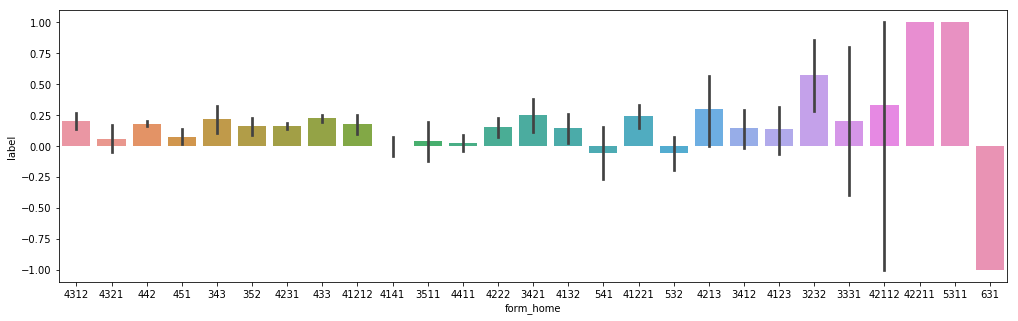

In [32]:
#Graphique des formations à domicile en fonction du label
plt.figure(figsize=(17,5))
sns.barplot(x='form_home', y='label',data=matchsTrainCopy)

Explication: Nous pouvons voir que suivant certaine formations le label a tendance a être plus élevé. C'est à dire que suivant une certaine formation, une équipe aura plus de chance de gagner un match

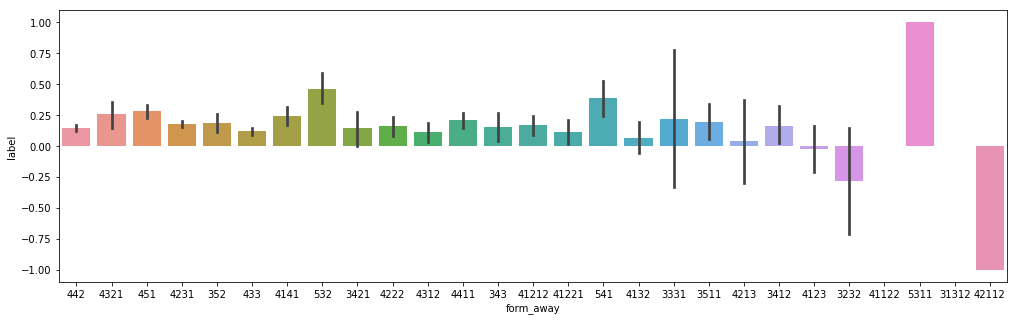

In [33]:
#Graphique des formations à l'extérieur en fonction du label
plt.figure(figsize=(17,5))
sns.barplot(x='form_away', y='label',data=matchsTrainCopy)

## Ajout des notes générales des joueurs

Pour ajouter les notes des joueurs, nous allons créer un dictionnaire avec comme clé un tuple avec l'api id et la date et comme valeur sa note générale ( En effet, la note d'un joueur varie en fonction du temps et un même joueur a donc plusieurs notes dans la table Players Attributes

In [34]:
def create_player_overall_dict(player_attr):
    ply_attr = player_attr[['player_api_id', 'overall_rating', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0]) # on retient seulement l'année
    ply_attr = ply_attr.groupby([ply_attr['player_api_id'], ply_attr['date']]).mean()

    return ply_attr.to_dict()['overall_rating']

ply_attr_overall_dict = create_player_overall_dict(player_attr)

Dans la table Players Attributs, il est possible qu'un joueur n'ai pas une note à une certaine date. Ce qui va provoquer un crash lorsqu'on voudra acceder à cette clé là (id,date)

In [35]:
def dict_key_checker(attr_dict, api_id, date):
    if(api_id is np.nan):# si l'api id est nulle nous renvoyons un Nan
        return np.nan
    try:
        res = attr_dict[(api_id, str(date))]
    except KeyError:
        date = int(date)
        dates = [int(k[1]) for k in attr_dict if k[0] == api_id]
        if not dates:  # si l'api id n'est pas présente dans le dictionnaire
            return 0
        res = attr_dict[(api_id, str(min(dates, key=lambda key: abs(key-date))))] # si la date n'est pas présente , 
        #on prend la date la plus proche
    return res

In [37]:
for i in range(1, 12):
    matchsTrainCopy['home_player_overall_'+str(i)] = matchsTrainCopy.apply(lambda x: 
            dict_key_checker(ply_attr_overall_dict, x['home_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)
    matchsTrainCopy['away_player_overall_'+str(i)] = matchsTrainCopy.apply(lambda x: 
            dict_key_checker(ply_attr_overall_dict, x['away_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)

Nous divisons la note par 99 car la note générale est une note entre 0 et 99. Ca nous permettera déjà de normaliser la note et se retrouver avec une valeur entre 0 et 1

In [38]:
matchsTrainCopy.head()

,index,id,season,stage,date,home_team_api_id,away_team_api_id,home_player_1,home_player_2,home_player_3,...,home_player_overall_7,away_player_overall_7,home_player_overall_8,away_player_overall_8,home_player_overall_9,away_player_overall_9,home_player_overall_10,away_player_overall_10,home_player_overall_11,away_player_overall_11
0,0,11103,2010/2011,17,2010-12-19 00:00:00,8533,9885,39477.0,39273.0,39721.0,...,0.727273,0.606061,0.747475,0.803030,0.696970,0.792929,0.777778,0.818182,0.686869,0.823232
1,1,16167,2009/2010,5,2009-08-29 00:00:00,8245,2186,13471.0,13301.0,NaN,...,0.000000,0.000000,0.646465,0.000000,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,11222,2010/2011,28,2011-03-06 00:00:00,9882,9880,27691.0,39729.0,24793.0,...,0.782828,0.722222,0.717172,0.732323,0.747475,0.767677,0.752525,0.782828,0.732323,0.696970
3,3,11018,2010/2011,1,2010-08-29 00:00:00,9976,9885,41818.0,41809.0,41879.0,...,0.757576,0.777778,0.707071,0.808081,0.727273,0.792929,0.696970,0.823232,0.787879,0.823232
4,4,25596,2013/2014,5,2013-08-10 00:00:00,9930,10192,67374.0,166507.0,25789.0,...,0.601010,0.640693,0.626263,0.696970,0.572391,0.654545,0.612795,0.660895,0.000000,0.704545


In [39]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_player_overall_10    0.067338
home_player_overall_9     0.066331
home_player_overall_7     0.064603
home_player_overall_6     0.063416
home_player_overall_4     0.062707
home_player_overall_11    0.062403
home_player_overall_8     0.061998
home_player_overall_1     0.061971
home_player_overall_3     0.058826
home_player_overall_5     0.058559
home_player_overall_2     0.057097
away_player_1             0.027935
away_player_3             0.019821
away_player_10            0.018535
away_player_11            0.015643
away_player_2             0.015437
away_team_api_id          0.013994
away_player_5             0.013871
away_player_8             0.013291
away_player_7             0.009550
away_player_6             0.009049
away_player_4             0.004572
away_player_9             0.002740
index                     0.002380
stage                    -0.000140
id                       -0.011120
home_player_4            -0.019047
home_player_9            -0.019221
home_player_3       

## Ajout du potentiel des joueurs

Nous recommencons la meme manipulation pour ajouter le potentiel des joueurs

In [40]:
def create_player_pot_dict(player_attr):
    ply_attr = player_attr[['player_api_id', 'potential', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0])
    ply_attr = ply_attr.groupby([ply_attr['player_api_id'], ply_attr['date']]).mean()

    return ply_attr.to_dict()['potential']

ply_attr_pot_dict = create_player_pot_dict(player_attr)

for i in range(1, 12):
    matchsTrainCopy['home_player_potential_'+str(i)] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(ply_attr_pot_dict, x['home_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)
    matchsTrainCopy['away_player_potential_'+str(i)] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(ply_attr_pot_dict, x['away_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)

In [41]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_player_overall_10      0.067338
home_player_overall_9       0.066331
home_player_potential_9     0.064620
home_player_overall_7       0.064603
home_player_overall_6       0.063416
home_player_overall_4       0.062707
home_player_overall_11      0.062403
home_player_overall_8       0.061998
home_player_overall_1       0.061971
home_player_potential_1     0.061808
home_player_potential_10    0.061714
home_player_potential_4     0.060686
home_player_potential_8     0.060163
home_player_potential_11    0.059872
home_player_potential_7     0.058864
home_player_overall_3       0.058826
home_player_overall_5       0.058559
home_player_overall_2       0.057097
home_player_potential_6     0.056964
home_player_potential_3     0.055122
home_player_potential_5     0.054670
home_player_potential_2     0.051632
away_player_1               0.027935
away_player_3               0.019821
away_player_10              0.018535
away_player_11              0.015643
away_player_2               0.015437
a

## Ajout des attributs defensePressure et le buildUpPlayPassing 

Nous recommencons la meme manipulation pour ajouter les attributs defensePressure et le buildUpPlayPassing

In [42]:
def create_team_attr_dict(teams_attr, key):
    tms_attr = teams_attr[['team_api_id', 'date','defencePressure', 'buildUpPlayPassing']]
    tms_attr['date'] = tms_attr['date'].apply(lambda x: x.split('-')[0])
    tms_attr = tms_attr.groupby([tms_attr['team_api_id'], tms_attr['date']]).mean()
    return tms_attr.to_dict()[key]

teams_buildUp_dict = create_team_attr_dict(team_attr, 'buildUpPlayPassing')
teams_def_press_dict = create_team_attr_dict(team_attr, 'defencePressure')

matchsTrainCopy['home_build_up'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_buildUp_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['away_build_up'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_buildUp_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['home_def_press'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_def_press_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['away_def_press'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_def_press_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)

In [43]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_player_overall_10      0.067338
home_player_overall_9       0.066331
home_def_press              0.065244
home_player_potential_9     0.064620
home_player_overall_7       0.064603
home_player_overall_6       0.063416
home_player_overall_4       0.062707
home_player_overall_11      0.062403
home_player_overall_8       0.061998
home_player_overall_1       0.061971
home_player_potential_1     0.061808
home_player_potential_10    0.061714
home_player_potential_4     0.060686
home_player_potential_8     0.060163
home_player_potential_11    0.059872
home_player_potential_7     0.058864
home_player_overall_3       0.058826
home_player_overall_5       0.058559
home_player_overall_2       0.057097
home_player_potential_6     0.056964
home_player_potential_3     0.055122
home_player_potential_5     0.054670
home_player_potential_2     0.051632
away_build_up               0.034656
away_player_1               0.027935
away_player_3               0.019821
away_player_10              0.018535
a

## Exploitation des notes générales / potentiel des joueurs et de la formation

Une idée que l'on pourrait avoir pour réduire le nombre de colonnes du training set est, grace à la formation, de faire une moyenne des notes d'une équipe par ligne ( défense , milieu et attaque)  

In [44]:
def get_nbr_players_by_lines(form):
    list_form = list(form)
    list_form = [int(x) for x in list_form]
    defenders = list_form[0] + 1  # le nombre de joueur sur la premiere ligne de la formation plus le gardien
    attackers = list_form[-1] # le nombre de joueur sur la derniere ligne de la formation
    midfielders = sum(list_form[1:-1]) # la somme des joueurs entre les ligne de defense et d'attaque
    return defenders, midfielders, attackers

In [52]:
matchsTrainCopy['form_home']

0         4312
1          NaN
2         4321
3          442
4          451
5          343
6          442
7          352
8         4231
9          NaN
10         433
11         442
12         433
13         442
14         352
15         NaN
16         442
17       41212
18        4141
19        4312
20         NaN
21         442
22         451
23         433
24         442
25         442
26         433
27         352
28        4231
29         442
         ...  
20449      442
20450      442
20451      442
20452      442
20453      442
20454    41221
20455      451
20456      433
20457      442
20458     3421
20459     4231
20460     4231
20461      NaN
20462      352
20463     4231
20464      433
20465      352
20466      433
20467     4231
20468     4231
20469     4231
20470     4231
20471      433
20472     4231
20473      NaN
20474     4312
20475      NaN
20476      NaN
20477     4231
20478      442
Name: form_home, Length: 20479, dtype: object

In [54]:
for index, row in matchsTrainCopy.iterrows():
    nbr_def_home, nbr_mid_home, nbr_att_home = get_nbr_players_by_lines(row['form_home'])
    nbr_def_away, nbr_mid_away, nbr_att_away = get_nbr_players_by_lines(row['form_away'])

    # Overall
    matchsTrainCopy.loc[index, 'home_def_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_mid_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_att_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

    matchsTrainCopy.loc[index, 'away_def_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_mid_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_att_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()


    # Potential
    matchsTrainCopy.loc[index, 'home_def_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_mid_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_att_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

    matchsTrainCopy.loc[index, 'away_def_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_mid_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_att_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()


In [55]:
#On supprime les colonnes qui ne nous serviront plus
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

In [56]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 26 columns):
index               20479 non-null int64
id                  20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
label               20479 non-null int64
form_home           20479 non-null object
form_away           20479 non-null object
home_build_up       20479 non-null float64
away_build_up       20479 non-null float64
home_def_press      20479 non-null float64
away_def_press      20479 non-null float64
home_def_overall    20479 non-null float64
home_mid_overall    20479 non-null float64
home_att_overall    20479 non-null float64
away_def_overall    20479 non-null float64
away_mid_overall    20479 non-null float64
away_att_overall    20479 non-null float64
home_def_pot        20479 non-null float64
home

In [57]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_mid_overall    0.071530
home_mid_pot        0.067833
home_def_overall    0.066293
home_def_press      0.065244
home_att_overall    0.063859
home_def_pot        0.063142
home_att_pot        0.059599
away_build_up       0.034656
away_team_api_id    0.013994
index               0.002380
stage              -0.000140
id                 -0.011120
home_team_api_id   -0.021259
home_build_up      -0.061913
away_att_pot       -0.063703
away_att_overall   -0.068643
away_def_pot       -0.075666
away_mid_pot       -0.075893
away_def_press     -0.075975
away_mid_overall   -0.079025
away_def_overall   -0.079412
dtype: float64

Nous pouvons voir que nous avons augmenté le score des correlations des notes géneraux de joueurs ainsi que leur potentiel en prennant les joueurs par ligne de champs!

## Rapport entre les attributs de l'équipe à domicile et à l'extérieur

L'idée ici sera d'effectuer un rapport (une difference) entre les colonnes des differents attributs des équipes domicile et extérieur. En effet cette difference, si elle est positif représentera une correlation positive avec le label , si négative une correlation négative

In [58]:
#Difference entre les 2 defenses , les 2 milieux et les 2 attaques
matchsTrainCopy['diff_def_overall'] = matchsTrainCopy['home_def_overall'] - matchsTrainCopy['away_def_overall']
matchsTrainCopy['diff_mid_overall'] = matchsTrainCopy['home_mid_overall'] - matchsTrainCopy['away_mid_overall']
matchsTrainCopy['diff_att_overall'] = matchsTrainCopy['home_att_overall'] - matchsTrainCopy['away_att_overall']

#Difference entre les ligne à confrontation direct c'est à dire l'attaque de l'équipe à domicile contre la defence 
# de l'équipe à l'extérieur ainsi que la defence domicile contre l'attaque extérieur
matchsTrainCopy['diff_att_home_def_away'] = matchsTrainCopy['home_att_overall'] - matchsTrainCopy['away_def_overall']
matchsTrainCopy['diff_def_home_att_away'] = matchsTrainCopy['home_def_overall'] - matchsTrainCopy['away_att_overall']

#Idem pour le potentiel
matchsTrainCopy['diff_def_pot'] = matchsTrainCopy['home_def_pot'] - matchsTrainCopy['away_def_pot']
matchsTrainCopy['diff_mid_pot'] = matchsTrainCopy['home_mid_pot'] - matchsTrainCopy['away_mid_pot']
matchsTrainCopy['diff_att_pot'] = matchsTrainCopy['home_att_pot'] - matchsTrainCopy['away_att_pot']

#Difference entre les 2 attributs d'equipe defensePressure et le buildUpPlayPassing
matchsTrainCopy['diff_build_up'] = matchsTrainCopy['home_build_up'] - matchsTrainCopy['away_build_up']
matchsTrainCopy['diff_def_press'] = matchsTrainCopy['home_def_press'] - matchsTrainCopy['away_def_press']


In [59]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 36 columns):
index                     20479 non-null int64
id                        20479 non-null int64
season                    20479 non-null object
stage                     20479 non-null int64
date                      20479 non-null object
home_team_api_id          20479 non-null int64
away_team_api_id          20479 non-null int64
label                     20479 non-null int64
form_home                 20479 non-null object
form_away                 20479 non-null object
home_build_up             20479 non-null float64
away_build_up             20479 non-null float64
home_def_press            20479 non-null float64
away_def_press            20479 non-null float64
home_def_overall          20479 non-null float64
home_mid_overall          20479 non-null float64
home_att_overall          20479 non-null float64
away_def_overall          20479 non-null float64
away_mid_overall         

In [60]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 36 columns):
index                     20479 non-null int64
id                        20479 non-null int64
season                    20479 non-null object
stage                     20479 non-null int64
date                      20479 non-null object
home_team_api_id          20479 non-null int64
away_team_api_id          20479 non-null int64
label                     20479 non-null int64
form_home                 20479 non-null object
form_away                 20479 non-null object
home_build_up             20479 non-null float64
away_build_up             20479 non-null float64
home_def_press            20479 non-null float64
away_def_press            20479 non-null float64
home_def_overall          20479 non-null float64
home_mid_overall          20479 non-null float64
home_att_overall          20479 non-null float64
away_def_overall          20479 non-null float64
away_mid_overall         

In [61]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

diff_mid_overall          0.291644
diff_def_overall          0.285932
diff_mid_pot              0.276612
diff_def_pot              0.271373
diff_att_home_def_away    0.211928
diff_def_home_att_away    0.204198
diff_att_overall          0.179612
diff_att_pot              0.165639
diff_def_press            0.117757
home_mid_overall          0.071530
home_mid_pot              0.067833
home_def_overall          0.066293
home_def_press            0.065244
home_att_overall          0.063859
home_def_pot              0.063142
home_att_pot              0.059599
away_build_up             0.034656
away_team_api_id          0.013994
index                     0.002380
stage                    -0.000140
id                       -0.011120
home_team_api_id         -0.021259
home_build_up            -0.061913
away_att_pot             -0.063703
away_att_overall         -0.068643
away_def_pot             -0.075666
away_mid_pot             -0.075893
away_def_press           -0.075975
diff_build_up       

Avec SelectKBest

In [62]:
dfCopy = matchsTrainCopy.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

                  Features       Score
22        diff_mid_overall  953.528186
21        diff_def_overall  912.147907
27            diff_mid_pot  849.914203
26            diff_def_pot  814.574804
24  diff_att_home_def_away  482.825327
25  diff_def_home_att_away  446.675916
23        diff_att_overall  341.414429
28            diff_att_pot  288.965482
30          diff_def_press  144.677936
12        away_def_overall   65.031810


In [63]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 36 columns):
index                     20479 non-null int64
id                        20479 non-null int64
season                    20479 non-null object
stage                     20479 non-null int64
date                      20479 non-null object
home_team_api_id          20479 non-null int64
away_team_api_id          20479 non-null int64
label                     20479 non-null int64
form_home                 20479 non-null object
form_away                 20479 non-null object
home_build_up             20479 non-null float64
away_build_up             20479 non-null float64
home_def_press            20479 non-null float64
away_def_press            20479 non-null float64
home_def_overall          20479 non-null float64
home_mid_overall          20479 non-null float64
home_att_overall          20479 non-null float64
away_def_overall          20479 non-null float64
away_mid_overall         

Nous allons garder les colonnes représentants la difference des notes générales , des potentiels et des attributs d'équipe et supprimer les diminuendes et les diminuteurs.

In [64]:
matchsTrainCopy = matchsTrainCopy.drop(['home_build_up','away_build_up','home_def_press','away_def_press','home_def_overall',
                                     'home_mid_overall','home_att_overall','away_def_overall','away_mid_overall',
                                     'away_att_overall','home_def_pot','home_mid_pot','home_att_pot','away_def_pot',
                                     'away_mid_pot','away_att_pot'], axis=1)

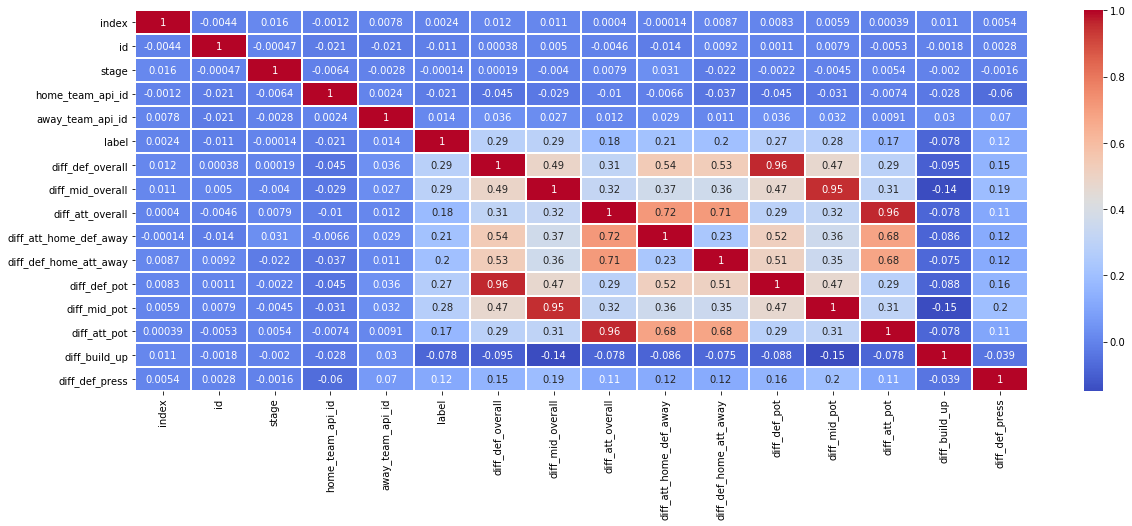

In [65]:
plt.figure(figsize=(20,7))
sns.heatmap(matchsTrainCopy.corr(),annot=True,cmap='coolwarm', linewidths=1)

HeatMap des valeurs numériques qu'on gardera comme features pour nos modeles

### Idées de transformation des données qui n'ont pas abouties
- Prendre des données statistiques à partir du training set comme le nombre totals des buts inscrits par une equipe , le nombre de victoire à domicile , le taux de victoire d'une équipe ou le aux de victoire d'une équipe à domicile dans les confrontations direct avec l'équipe extérieur => ces données repésentaient un risque d'overfitting c'est pourquoi cette idée n'a pas aboutie
- PCA : vu le nombre réduit de nos features , le PCA n'a pas donnée de résultats concluants

In [66]:
#Copie de la colonne label et suppression de celle ci dans le training set
label = matchsTrainCopy[['label']]
matchsTrainCopy = matchsTrainCopy.drop(['label'], axis=1)

## Data Normalization


Dans un premier temps, on écrit et exécute tout les imports qu'on a besoin pour nettoyer les données

In [67]:
from sklearn.base import TransformerMixin  # gives fit_transform method for free
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, MultiLabelBinarizer
from sklearn.preprocessing import Imputer, OrdinalEncoder
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = MultiLabelBinarizer(*args, **kwargs)

    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self

    def transform(self, x, y=0):
        return self.encoder.transform(x)

On a crée une classe Data_cleaning qui s'occupe de nettoyer les données en une fois.

Afin de cleaner les datas, nous avons utilisé un pipeline.
Pour utiliser ce pipeline, on a séparé les datas en 2 catégories :
    1. les variables numériques ( de type float64 ou int64 )
    2. les variables catégorielles ( la saison dans ce cas-ci )
    
- Les variables numériques
    
    1. Quelle méthode choisir entre MinMaxScaler() et StandarScaler() pour la mise à l'échelle des données ?   

- les variables catégorielles

    On applique un multiLabelBinazer pour pouvoir utiliser les variables catégorielles dans le modèle. (Le multiBinazer fait un OneHotEncoder pour chaque variables catégorielles)


### MinMaxScaler ou StandardScaler

Un choix important de mise à l'échelle est de choisir entre MinMaxScaler et StandardScaler. Nous avons trouvé une explication pour savoir  quelle méthode favoriser. Voici la source. 

Standardscaler:

1.In Standardscaler, it assumes that data has normally distributed features and will scale them to zero mean and 1 standard deviation.

2.All the features will be of the same scale after applying the scaler.

Minmaxscaler :

1.Minmaxscaler  shrinks the data within the range of -1 to 1(if there are negative values)

2. This responds well if standard deviation is small and  is used when distribution is not Gaussian.This scaler is sensitive to outliers.


source : https://intellipaat.com/community/9629/difference-between-standard-scaler-and-minmaxscaler

Nous allons donc ploter les différentes variables numériques.

Mais dans un premier temps, nous prenons un dataframe sur lequel on a appliqué l'engineering. Et on sélectionne les colonnes contenant des données de types réels mise sous forme de variables continues. Toutes les variables pouvant contenir des outliers.



In [68]:
import pandas as pd
from sklearn.pipeline import FeatureUnion

matchsTrainCleaning = matchsTrainCopy

matchsTrainCleaning.drop(columns=['index'],inplace=True)

matchsTrainCleaning.head()

#On peut voir que les variables continues sont à partir de la colonne 7

,id,season,stage,date,home_team_api_id,away_team_api_id,form_home,form_away,diff_def_overall,diff_mid_overall,diff_att_overall,diff_att_home_def_away,diff_def_home_att_away,diff_def_pot,diff_mid_pot,diff_att_pot,diff_build_up,diff_def_press
0,11103,2010/2011,17,2010-12-19 00:00:00,8533,9885,4312,442,-0.037374,-0.037879,-0.088384,-0.043434,-0.082323,-0.067677,-0.031566,-0.085859,-0.050505,-0.202020
1,16167,2009/2010,5,2009-08-29 00:00:00,8245,2186,4231,4231,0.021212,0.262626,0.000000,-0.354545,0.375758,-0.012121,0.272727,0.000000,0.000000,-0.202020
2,11222,2010/2011,28,2011-03-06 00:00:00,9882,9880,4321,4321,0.042424,0.008081,0.035354,0.014141,0.063636,0.019192,0.006061,-0.020202,0.151515,0.000000
3,11018,2010/2011,1,2010-08-29 00:00:00,9976,9885,442,442,-0.049495,-0.065657,-0.080808,-0.036364,-0.093939,-0.073737,-0.077020,-0.126263,-0.050505,-0.101010
4,25596,2013/2014,5,2013-08-10 00:00:00,9930,10192,451,451,-0.050188,-0.068735,-0.704545,-0.666349,-0.088384,-0.050361,-0.050274,-0.744949,-0.131313,0.030303


In [69]:
#Les variables continues sont les colonnes 7 à 16
matchsTrainNumVariables = matchsTrainCleaning.iloc[:,10:19]

colLabels = matchsTrainNumVariables.columns

matchsTrainNumVariables.head()

matchsTrainNumVariables.describe()

# Description de la variance

,diff_att_overall,diff_att_home_def_away,diff_def_home_att_away,diff_def_pot,diff_mid_pot,diff_att_pot,diff_build_up,diff_def_press
count,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000
mean,-0.000544,0.006806,-0.007026,0.000201,0.001292,-0.001165,0.001033,-0.000954
std,0.134189,0.112237,0.110187,0.081130,0.083638,0.141728,0.153123,0.145311
min,-0.888889,-0.796700,-0.757576,-0.722222,-0.657576,-0.924242,-0.666667,-0.707071
25%,-0.044150,-0.026768,-0.056566,-0.037715,-0.039667,-0.045455,-0.101010,-0.090909
50%,0.000000,0.011616,-0.011111,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.045455,0.056902,0.028238,0.038056,0.041667,0.045455,0.101010,0.080808
max,0.848485,0.722222,0.806285,0.722222,0.602273,0.888889,0.676768,0.707071


## Data Visualization

### Boxplot pour visualiser si présences d'outliers

Les outliers sont indiqués sur le graphe par des losanges noirs.


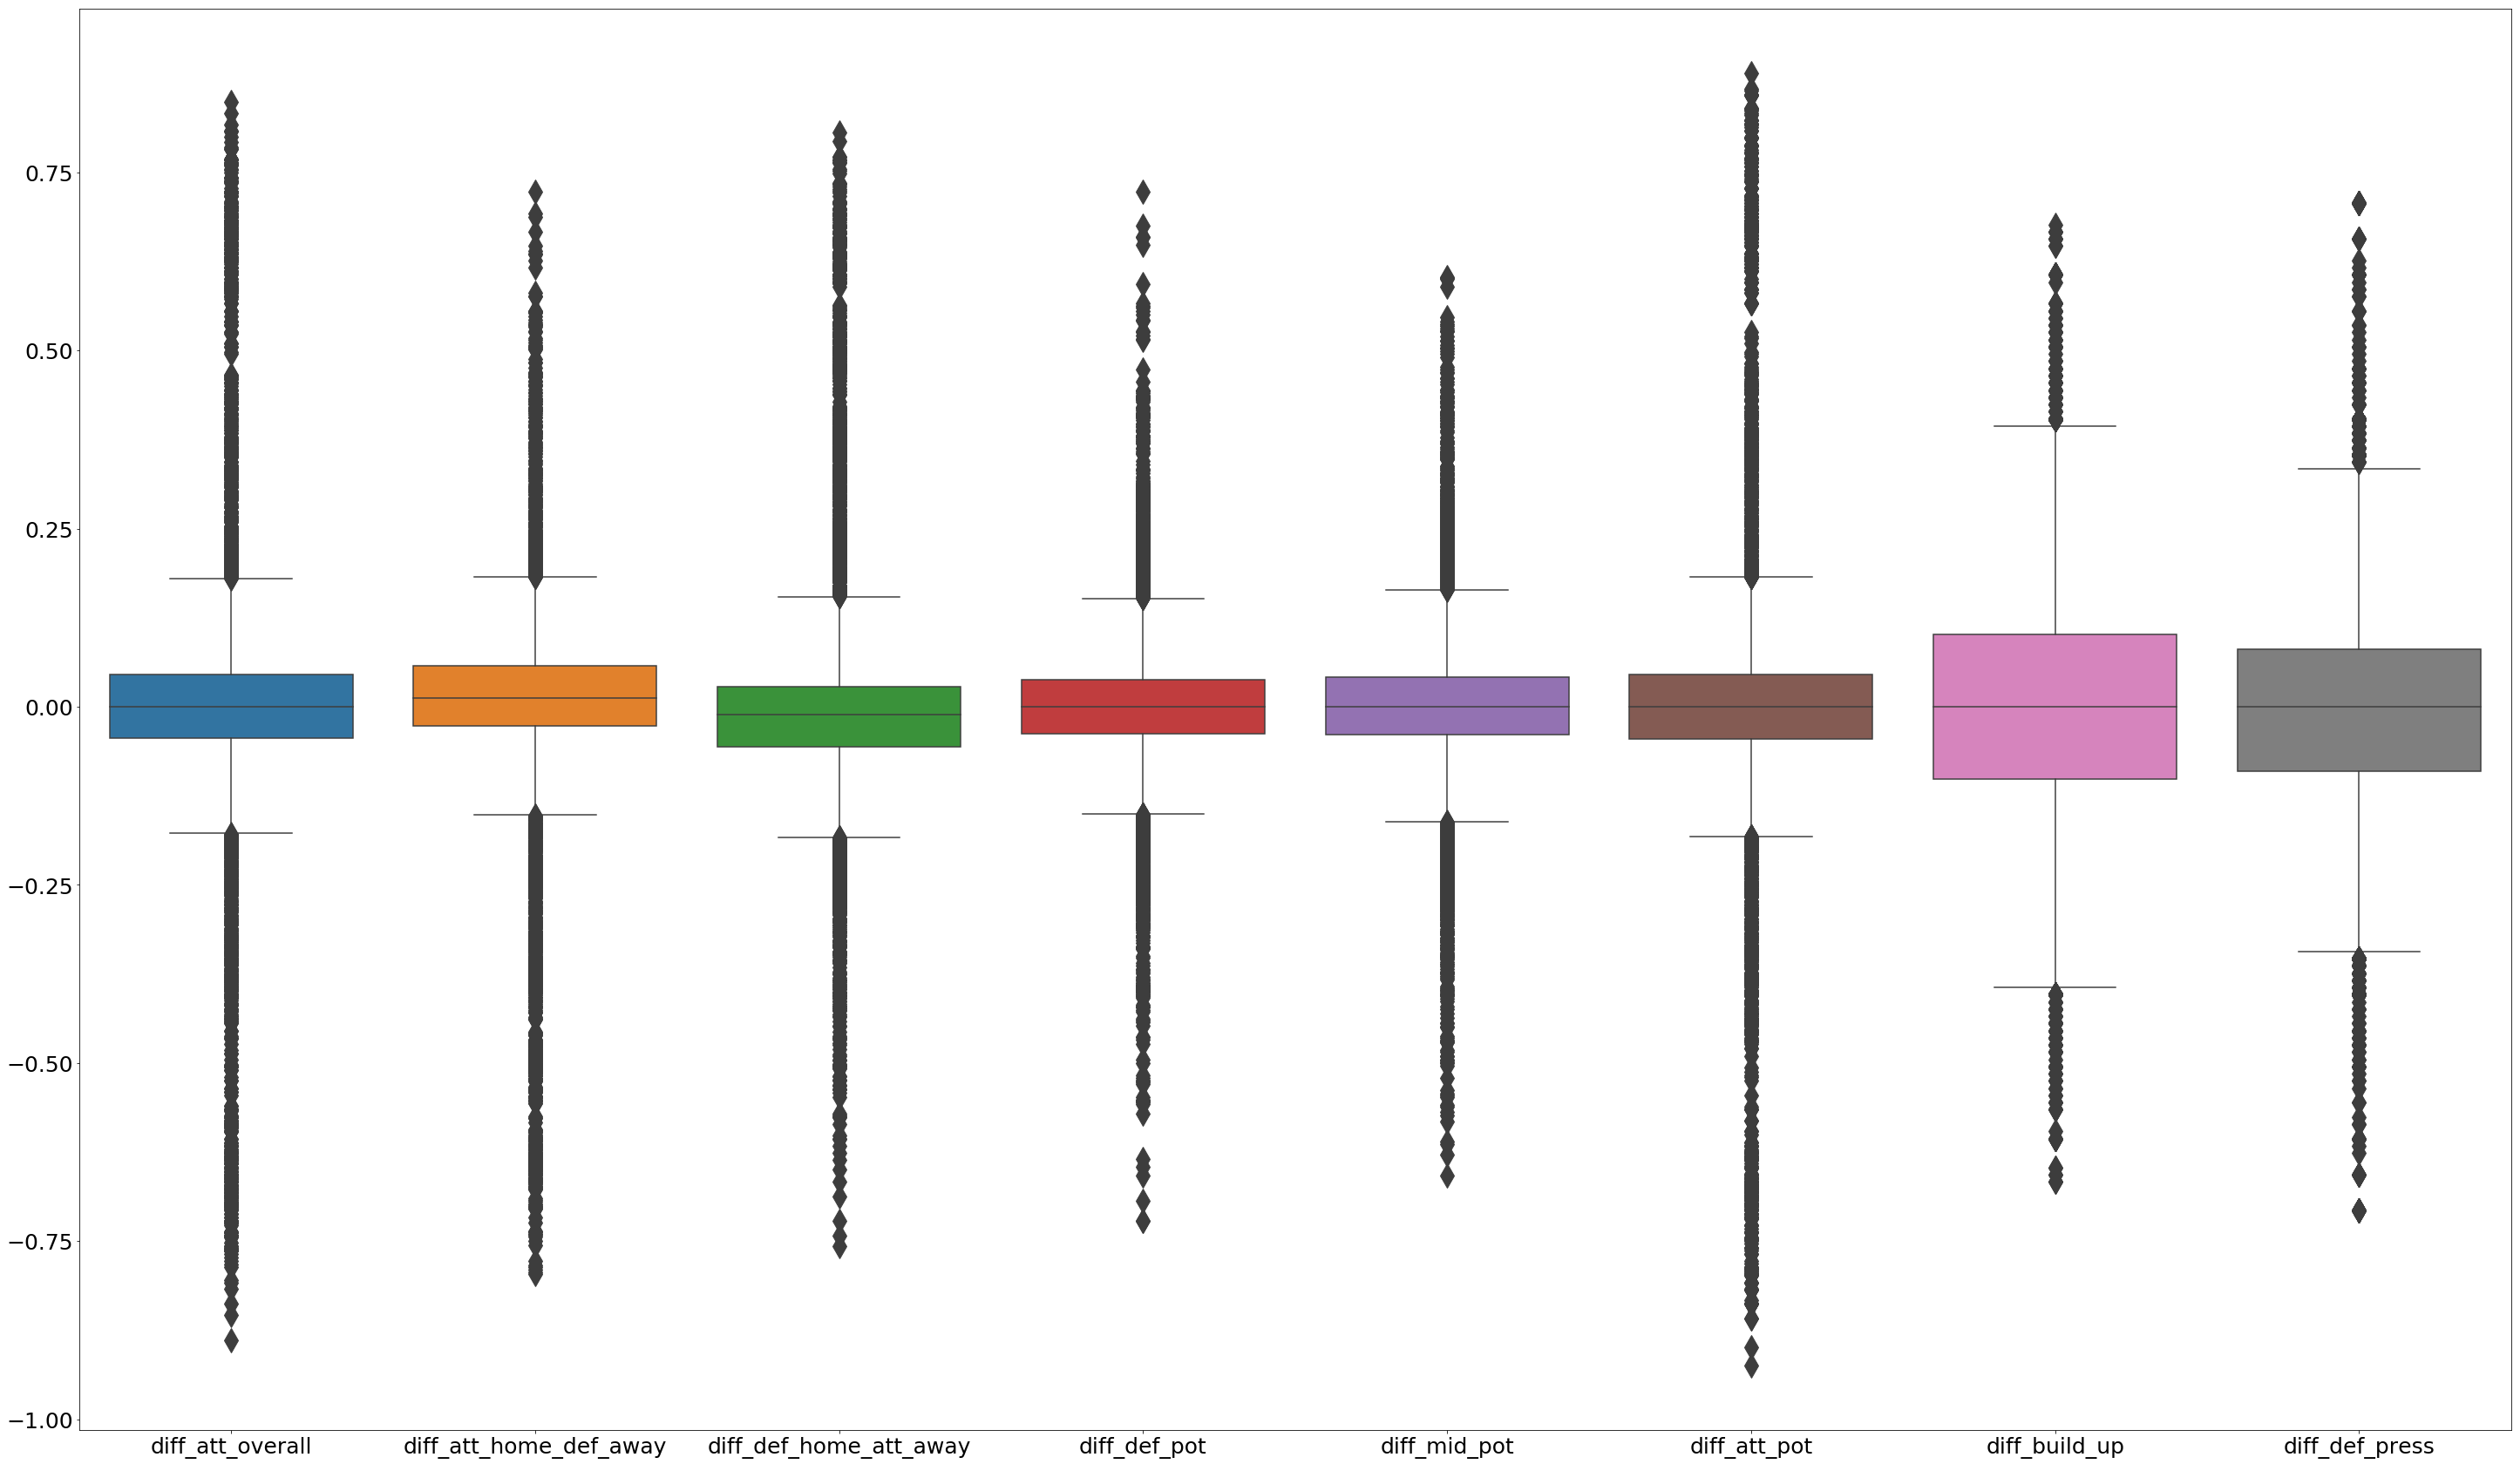

In [70]:

import matplotlib.pyplot as plt
import seaborn as sns

## PLOTING BOXPLOT
fig3,ax3 = plt.subplots(figsize=(50,30))
ax = sns.boxplot(data=matchsTrainNumVariables,fliersize=20)
ax.tick_params(labelsize=25)
plt.show()

### Distribution des différents variables via histogrammes

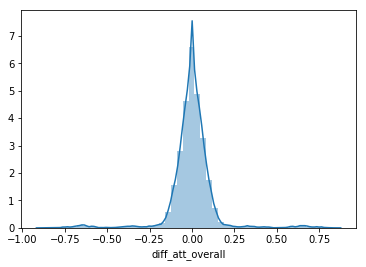

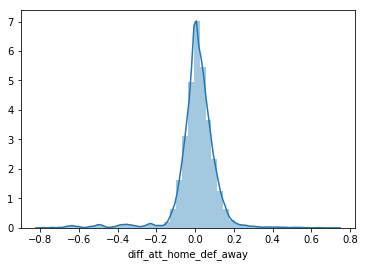

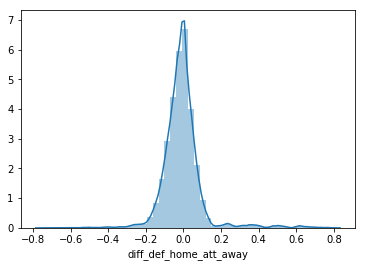

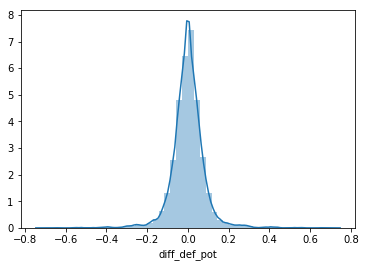

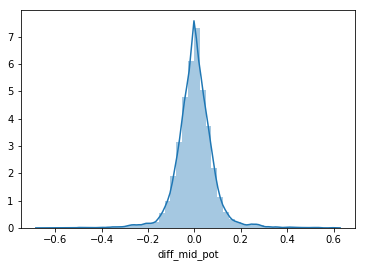

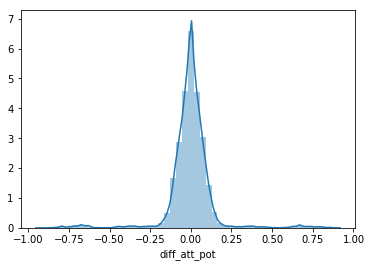

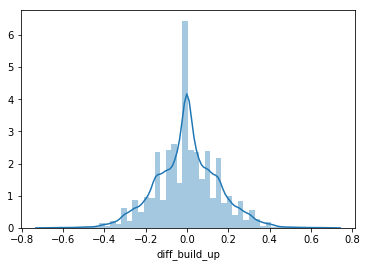

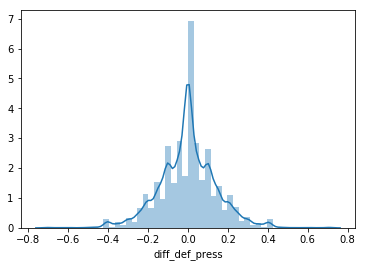

In [71]:

for i in range(0,matchsTrainNumVariables.shape[1]):
    plt.figure(i)
    sns.distplot(matchsTrainNumVariables.iloc[:,i])
    plt.show()

#### Conclusion choix du Scaler

Etant donné que certaines distributions de variables continues ne suivent pas totalement une distribution Normale ( Gaussienne) et qu'on a vu sur le graphes des boxplots, des présences d'outliers, nous avons choisit le MinMaxScaler comme méthode de mise à l'échelle. La déviation standard des variables est aussi petites (voir tableau Out[5] ) ce qui vient appuyer le choix du MinMaxScaler.


On fait donc via un pipeline la normalisation ainsi que l'application d'un OneHotEncoder via MultiLabelBinazer.

In [72]:
class Data_Normalization:
    def __init__(self, matchs):
        self.matchs = matchs

    def run(self):

        # Récupérer toutes les features du type float64
        numerical_data = self.matchs.select_dtypes(["float64", 'int64'])
        num_attribs = list(numerical_data)
        # Changer le type des saisons d'objets à categorique

        
        categorical_attrib = ['season']
        self.matchs[categorical_attrib] = self.matchs[categorical_attrib].apply(
            lambda x: x.astype('category'))

        # Utilisation de pipeline pour clean les data

        num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', Imputer(strategy="median")),
            ('min_max_scaler', StandardScaler()),
        ])

        categorical_pipeline = Pipeline([
            ('selector', DataFrameSelector(categorical_attrib)),
            ('label_binazer', MyLabelBinarizer()),
        ])

        from sklearn.pipeline import FeatureUnion
        full_pipeline = FeatureUnion(transformer_list=[
            ('num_pipeline', num_pipeline),
            ('categorical_pipeline', categorical_pipeline)
        ])

        # data are clean here
        match_cleaned = full_pipeline.fit_transform(self.matchs)
        return match_cleaned

    
matchsTrainCleaned = Data_Normalization(matchsTrainCopy).run()

matchsTrainCleaned = pd.DataFrame(matchsTrainCleaned)

matchsTrainCleaned.head()

C:\Users\marci\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.255717,-0.117724,-0.101294,-0.010321,-0.485896,-0.494391,-0.654614,-0.447636,-0.683379,-0.836675,...,-0.336590,-1.383725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.420197,-1.271753,-0.122582,-0.539298,0.269238,3.291553,0.004052,-3.219617,3.474042,-0.151882,...,-0.006749,-1.383725,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.239833,0.940136,-0.001581,-0.010665,0.542649,0.084636,0.267519,0.065360,0.641312,0.234092,...,0.982777,0.006565,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.267062,-1.656429,0.005367,-0.010321,-0.642131,-0.844352,-0.598157,-0.384637,-0.788805,-0.911380,...,-0.336590,-0.688580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.678726,-1.271753,0.001967,0.010772,-0.651059,-0.883135,-5.246463,-5.997769,-0.738384,-0.623233,...,-0.864337,0.215108,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Complete Workflow (Fetching, Cleaning and Preparing)<a class="anchor" id="pipelines"></a>
 [Table des matières](#tableContents)

In [ ]:
# IMPORTS
import sqlite3
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, MultiLabelBinarizer
from sklearn.preprocessing import Imputer, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Enlever les warnings
import warnings
from sklearn.pipeline import Pipeline
warnings.simplefilter("ignore")


###############FETCHING########################

class Fetching(BaseEstimator, TransformerMixin):
    def __init__(self, connect_string):
        self.connect_string = connect_string

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print("******* Data Fetching *******")
        dat = sqlite3.connect(self.connect_string)

        table = ["Country", "League", "X_Train", "X_Test", "Player", "Player_Attributes",
                 "Team", "Team_Attributes"]

        df_dict = {}

        for name in table:
            query = dat.execute("SELECT * From " + name)
            cols = [column[0] for column in query.description]
            results = pd.DataFrame.from_records(
                data=query.fetchall(), columns=cols)
            df_dict[name.lower()] = results

        return df_dict

###############CLEANING AND PREPARING########################
    
class CleaningAndPreparing(BaseEstimator, TransformerMixin):

    def __init__(self, isMatchsTrain=None):
        self.matchs = None
        self.player_attr = None
        self.ply_attr_overall_dict = None
        self.ply_attr_pot_dict = None
        self.teams_name_dict = None
        self.teams_shooting_dict = None
        self.teams_def_dict = None
        # On regarde si on applique la transformation au train set ou au test set
        if(isMatchsTrain is None):
            self.is_test_set = False
        else:
            self.is_test_set = True
        # Nous retenons les formations les plus récurrentes pour les injecter dans le test set
        self.best_formations = {
            'home_form': "",
            'away_form': ""
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print("******* Data Cleaning and Preparing *******")
        # Initialisation apd du X
        if(self.is_test_set):
            self.matchs = X['x_test']
        else:
            self.matchs = X['x_train']

        self.ply_attr_overall_dict = create_player_overall_dict(
            X['player_attributes'])
        self.ply_attr_pot_dict = create_player_pot_dict(X['player_attributes'])
        self.teams_shooting_dict = create_team_attr_chance_dict(
            X['team_attributes'], 'buildUpPlayPassing')
        self.teams_def_dict = create_team_attr_chance_dict(
            X['team_attributes'], 'defencePressure')

        # Droping irrelevent columns
        self.matchs.drop(['country_id', 'league_id',
                          'match_api_id'], axis=1, inplace=True)

        # Create a formation with the Y coordinates
        print("Creating formations...")
        self.matchs['home_form'] = self.matchs.apply(
            lambda x: create_formation(x, True), axis=1)
        self.matchs['away_form'] = self.matchs.apply(
            lambda x: create_formation(x, False), axis=1)

        if(self.is_test_set == False):
            # Nous sauvgardons les formations
            """self.best_formations['home_form'] = self.matchs['home_form'].value_counts(
            ).index[0]
            self.best_formations['away_form'] = self.matchs['away_form'].value_counts(
            ).index[0]"""
            self.matchs[['home_form', 'away_form']] = self.matchs[['home_form', 'away_form']].apply(
                lambda x: x.fillna(x.value_counts().index[0]))
        else:
            self.matchs[['home_form', 'away_form']] = self.matchs[['home_form', 'away_form']].apply(
                lambda x: x.fillna('4231'))

        # Cleaning the date (take only dd-mm-yyy)
        self.matchs['date'] = self.matchs['date'].apply(
            lambda x: x.split(' ')[0])

        print('Putting overall teams ratings...')
        for i in range(1, 12):
            self.matchs['home_player_overall_'+str(i)] = self.matchs.apply(
                lambda x: dict_key_checker(self.ply_attr_overall_dict, x['home_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)
            self.matchs['away_player_overall_'+str(i)] = self.matchs.apply(
                lambda x: dict_key_checker(self.ply_attr_overall_dict, x['away_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)

        print('Putting overall teams potential...')
        for i in range(1, 12):
            self.matchs['home_player_potential_'+str(i)] = self.matchs.apply(
                lambda x: dict_key_checker(self.ply_attr_pot_dict, x['home_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)
            self.matchs['away_player_potential_'+str(i)] = self.matchs.apply(
                lambda x: dict_key_checker(self.ply_attr_pot_dict, x['away_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)

        print("Putting buildUp and defence press...")
        self.matchs['home_build_up'] = self.matchs.apply(lambda x: dict_key_checker(
            self.teams_shooting_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
        self.matchs['away_build_up'] = self.matchs.apply(lambda x: dict_key_checker(
            self.teams_shooting_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)

        self.matchs['diff_build_up'] = self.matchs['home_build_up'] - \
            self.matchs['away_build_up']

        self.matchs['home_def_press'] = self.matchs.apply(lambda x: dict_key_checker(
            self.teams_def_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
        self.matchs['away_def_press'] = self.matchs.apply(lambda x: dict_key_checker(
            self.teams_def_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)

        self.matchs['diff_def_press'] = self.matchs['home_def_press'] - \
            self.matchs['away_def_press']

        print("Putting team overall by lines ...")
        for index, row in self.matchs.iterrows():

            nbr_def_home, nbr_mid_home, nbr_att_home = get_nbr_players_by_lines(
                row['home_form'])
            nbr_def_away, nbr_mid_away, nbr_att_away = get_nbr_players_by_lines(
                row['away_form'])

            # Overall
            self.matchs.loc[index, 'home_def_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
            self.matchs.loc[index, 'home_mid_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
            self.matchs.loc[index, 'home_att_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

            self.matchs.loc[index, 'away_def_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
            self.matchs.loc[index, 'away_mid_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
            self.matchs.loc[index, 'away_att_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()

            # Potential
            self.matchs.loc[index, 'home_def_pot'] = row.loc[[
                'home_player_potential_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
            self.matchs.loc[index, 'home_mid_pot'] = row.loc[[
                'home_player_potential_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
            self.matchs.loc[index, 'home_att_pot'] = row.loc[[
                'home_player_potential_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

            self.matchs.loc[index, 'away_def_pot'] = row.loc[[
                'away_player_potential_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
            self.matchs.loc[index, 'away_mid_pot'] = row.loc[[
                'away_player_potential_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
            self.matchs.loc[index, 'away_att_pot'] = row.loc[[
                'away_player_potential_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()

        self.matchs['diff_def_overall'] = self.matchs['home_def_overall'] - \
            self.matchs['away_def_overall']
        self.matchs['diff_mid_overall'] = self.matchs['home_mid_overall'] - \
            self.matchs['away_mid_overall']
        self.matchs['diff_att_overall'] = self.matchs['home_att_overall'] - \
            self.matchs['away_att_overall']

        self.matchs['diff_att_home_def_away'] = self.matchs['home_att_overall'] - \
            self.matchs['away_def_overall']
        self.matchs['diff_def_home_att_away'] = self.matchs['home_def_overall'] - \
            self.matchs['away_att_overall']

        self.matchs['diff_def_pot'] = self.matchs['home_def_pot'] - \
            self.matchs['away_def_pot']
        self.matchs['diff_mid_pot'] = self.matchs['home_mid_pot'] - \
            self.matchs['away_mid_pot']
        self.matchs['diff_att_pot'] = self.matchs['home_att_pot'] - \
            self.matchs['away_att_pot']

        self.matchs.drop(self.matchs.select(
            lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)

        self.matchs.drop(self.matchs.select(
            lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

        self.matchs = self.matchs.drop(['home_build_up', 'away_build_up', 'home_def_press', 'away_def_press', 'home_def_overall',
                                        'home_mid_overall', 'home_att_overall', 'away_def_overall', 'away_mid_overall',
                                        'away_att_overall', 'home_def_pot', 'home_mid_pot', 'home_att_pot', 'away_def_pot',
                                        'away_mid_pot', 'away_att_pot', 'date'], axis=1)

        return self.matchs


def det_label(score1, score2):
    if(score1 == score2):
        return 0
    if(score1 < score2):
        return -1
    else:
        return 1


def create_formation(row, home):
    list_form = list()  # We need a list for Counter
    if(home):
        list_form = row.loc[row.index.str.startswith(
            'home_player_Y')].tolist()[1:]  # We don't take the goalkeeper
    else:
        list_form = row.loc[row.index.str.startswith(
            'away_player_Y')].tolist()[1:]

    if(True in np.isnan(list_form)):
        return np.nan

    # Will create a dict with the occurences of the players's positions
    counter = Counter(list_form)
    couter_val = counter.values()
    # concatenates the values in a string like : 442
    form = ''.join((str(e) for e in list(couter_val)))
    return form


def dict_key_checker(attr_dict, api_id, date):
    if(api_id is np.nan):
        return np.nan
    try:
        res = attr_dict[(api_id, str(date))]
    except KeyError:
        date = int(date)
        dates = [int(k[1]) for k in attr_dict if k[0] == api_id]
        if not dates:  # api_id not in keys
            return 0
        res = attr_dict[(api_id, str(
            min(dates, key=lambda key: abs(key-date))))]
    # print("Result : "+str(res))
    return res


def get_nbr_players_by_lines(form):
    list_form = list(form)
    list_form = [int(x) for x in list_form]
    defenders = list_form[0] + 1  # plus le gardien
    attackers = list_form[-1]
    midfielders = sum(list_form[1:-1])
    return defenders, midfielders, attackers

def create_player_overall_dict(player_attr):
    ply_attr = player_attr[[
        'player_api_id', 'overall_rating', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0])

    ply_attr = ply_attr.groupby(
        [ply_attr['player_api_id'], ply_attr['date']]).mean()

    # Replace id of players with their overall rating at the date of the match

    return ply_attr.to_dict()['overall_rating']


def create_player_pot_dict(player_attr):
    ply_attr = player_attr[[
        'player_api_id', 'potential', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0])

    ply_attr = ply_attr.groupby(
        [ply_attr['player_api_id'], ply_attr['date']]).mean()

    # Replace id of players with their overall rating at the date of the match

    return ply_attr.to_dict()['potential']


def create_team_attr_chance_dict(teams_attr, key):
    tms_attr = teams_attr[['team_api_id', 'date',
                           'defencePressure', 'buildUpPlayPassing']]
    tms_attr['date'] = tms_attr['date'].apply(lambda x: x.split('-')[0])
    tms_attr = tms_attr.groupby(
        [tms_attr['team_api_id'], tms_attr['date']]).mean()
    return tms_attr.to_dict()[key]


############### NORMALIZATION ########################

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = MultiLabelBinarizer(*args, **kwargs)

    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self

    def transform(self, x, y=0):
        return self.encoder.transform(x)


class Normalization:

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        # Récupérer toutes les features du type float64
        numerical_data = X.select_dtypes(["float64", 'int64'])
        num_attribs = list(numerical_data)
        # Changer le type des saisons d'objets à categorique

        categorical_attrib = ['season']
        X[categorical_attrib] = X[categorical_attrib].apply(
            lambda x: x.astype('category'))

        # Utilisation de pipeline pour clean les data

        num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('min_max_scaler', StandardScaler()),
        ])

        categorical_pipeline = Pipeline([
            ('selector', DataFrameSelector(categorical_attrib)),
            ('label_binazer', MyLabelBinarizer()),
        ])

        from sklearn.pipeline import FeatureUnion
        full_pipeline = FeatureUnion(transformer_list=[
            ('num_pipeline', num_pipeline),
            ('categorical_pipeline', categorical_pipeline)
        ])

        # data are clean here
        match_cleaned = full_pipeline.fit_transform(X)
        return match_cleaned


pipe = Pipeline([
    ('fetch', Fetching('../database/database.sqlite')),
    ('prepare_clean', CleaningAndPreparing()),
    ('normalization', Normalization())
])

data_cleaned = pipe.fit_transform(None)


# 4) Train Model Step<a class="anchor" id="train_model"></a>
 [Table des matières](#tableContents)

## Entrainement du modèle

Pour avoir des prédictions de football, il faut avoir un modèle sur lequel entrainer les données des matchs de foot que l'on a déjà. C'est lors de cette étape que l'on va chercher ce modèle parmis plusieurs modèles de machine learning.   
On va tester différentes valeurs pour les hyperparamètres de plusieurs modèles, lors d'une étape appelée **hyperparameters tuning**, afin de trouver le meilleur modèle.


Commençons d'abord par importer toutes les librairies qui nous seront utiles pour cette étape.

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings

Dans un premier temps, on va splitter notre dataset qui est nettoyé pour pouvoir tester les résultats de l'entrainement du modèle qu'on choisirra.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    matchsTrainCleaned, label, random_state=5)

## Tuning des hyperparamètres




Auparavant, nous avions utilisé un GridSearch pour le tuning des paramètres.  
Cependant, dans un second temps,nous avons utilisé un RandomizedSearch à la place, car nous avons eu de meilleurs performances avec lors des prédictions.  
Pour ce faire,nous avons utilisé une classe tirée d'internet. La source est indiquée en haut de la cellule ci-dessous.  

Cette classe permet d'afficher la meilleure valeur à prendre pour chaque hyperparamètre afin d'obtenir un meilleur modèle.

In [70]:
"""
Class helper for parameter tuning 
Source: http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
Modified for our needs
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


class RandomizedSearchHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError(
                "Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def get_gs_best_params(self, key):
        return self.grid_searches[key].best_params_

    def get_gs(self, key):
        return self.grid_searches[key]

    def fit(self, X, y, cv=5, n_jobs=-1, verbose=1, scoring=None, refit=False, n_iter=30):
        for key in self.keys:
            print("Running RandomizedSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = RandomizedSearchCV(model, params, n_iter=n_iter, cv=cv, n_jobs=n_jobs,
                                    verbose=verbose, scoring=scoring, refit=refit,
                                    return_train_score=True)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]


Nous pouvons voir que l'initialisation de cette classe RandomizedSearchHelper prend en paramètre des modèles et des paramètres.  

Nous créeons donc un dictionnaire **models** et un dictionnaire **params** contenant des dictionnaires qui son les différents modèles. C'est dans params que nous définissons les différentes valeurs à tester pour les hyperparamètres.

Remarquez que nous utilisons la classe random, pour le tuning des paramètres afin n'avoir des valeurs aléatoires pour le RandomizedSearch.  
On peut tester plusieurs modèles en même temps, ici nous allons tester plusieurs modèles tels que RandomForrest,SGDCLassifier,LogisticClassifier

In [93]:
from numpy import random

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'SGDClassifier' : SGDClassifier(),
    'LogisticRegression' : LogisticRegression(),
}

params = {
    'RandomForestClassifier': {
        'n_estimators': random.randint(1, 500, 50),
        'max_depth': random.randint(1, 500, 50),
        'max_features': ['sqrt', 'log2', 'auto'],
        'min_samples_split': random.randint(1, 500, 50),
        'min_samples_leaf': random.randint(1, 500, 50),
    },
    'SGDClassifier': {
        'alpha' : random.uniform(low=0.00001, high=0.03 , size = 50),
        'max_iter': random.randint(500, 5000, 50),  # number of epochs
        'loss': ['hinge', 'log', 'modified_huber'],
        'penalty': ['l2', 'l1', 'none', 'elasticnet'],
    },
    'LogisticRegression': {
        'C': random.uniform(low=0.00001, high=1 , size = 20),
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga'],
    }
}

Nous définissons une variable helper qui est un objet RandomizedSearchHelper(). On entraine ensuite cet objet avec les sets d'entrainements par la méthode **fit**.

In [94]:
helper = RandomizedSearchHelper(models, params)
helper.fit(X_train, y_train,
           scoring="accuracy", n_jobs=6, n_iter=50, cv=3)

Running RandomizedSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   58.6s
[Parallel(n_jobs=6)]: Done 150 out of 150 | elapsed:  3.5min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Running RandomizedSearchCV for SGDClassifier.
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 150 out of 150 | elapsed:    8.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Running RandomizedSearchCV for LogisticRegression.
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.4s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   39.0s finished


In [95]:
scoring_table = helper.score_summary()

RandomForestClassifier
SGDClassifier
LogisticRegression


In [99]:
scoring_table

,estimator,min_score,mean_score,max_score,std_score,C,alpha,loss,max_depth,max_features,max_iter,min_samples_leaf,min_samples_split,n_estimators,penalty,solver
31,RandomForestClassifier,0.511819,0.521843,0.527447,0.00710486,NaN,NaN,NaN,381,log2,NaN,484,417,206,NaN,NaN
18,RandomForestClassifier,0.512405,0.521192,0.526069,0.00622614,NaN,NaN,NaN,87,log2,NaN,341,224,401,NaN,NaN
1,RandomForestClassifier,0.513577,0.521062,0.524907,0.00529351,NaN,NaN,NaN,420,auto,NaN,1,472,415,NaN,NaN
36,RandomForestClassifier,0.511233,0.520932,0.527837,0.00706088,NaN,NaN,NaN,129,log2,NaN,77,214,206,NaN,NaN
28,RandomForestClassifier,0.511623,0.520932,0.527436,0.00675304,NaN,NaN,NaN,422,auto,NaN,279,453,288,NaN,NaN
4,RandomForestClassifier,0.513772,0.520867,0.524517,0.00501732,NaN,NaN,NaN,296,log2,NaN,206,355,159,NaN,NaN
38,RandomForestClassifier,0.511428,0.520802,0.526275,0.00665916,NaN,NaN,NaN,401,auto,NaN,473,126,288,NaN,NaN
25,RandomForestClassifier,0.512405,0.520671,0.525493,0.00587241,NaN,NaN,NaN,156,log2,NaN,204,342,191,NaN,NaN
44,RandomForestClassifier,0.511819,0.520671,0.525884,0.00629265,NaN,NaN,NaN,258,sqrt,NaN,246,322,176,NaN,NaN
48,RandomForestClassifier,0.512991,0.520671,0.524517,0.00543101,NaN,NaN,NaN,322,log2,NaN,30,173,310,NaN,NaN


Nous remarquons que Le modèle randomForrest surpasse largement les 2 autres modèles. Nous allons donc nous pencher sur celui-là afin d'évaluer le modèle.

Dans cet exemple, nous avons juste pris les modèles suivants :  
 - RandomForrestClassifier
 - LogisticClassifier
 - SGDClassifier
 
Cependant, nous avons tester d'autres modèles tels que le SVMClassifier, le KneighborsClassifier, le AdaBoostClassifier, et d'autres encore. Malgré cela, rien n'a eu de meilleures performances que le randomForrestClassifier.
 
Nous nous sommes posés la question, mais pourquoi est-il au dessus ?

Nous nous sommes documenté la dessus et nous avons trouvé des explications.

Le RandomForrest est un ensemble modèle, çad, un modèle qui combine plusieurs autres modèles afin de produire de meilleure prédiction qu'un modèle simple. Et en y réfléchissant c'est normal vu que le randomForrest est une combination de plusieurs arbres de décision.

Nous définissons maintenant un classifier qui est un randomForrest avec les meilleurs paramètres issus du **parameters tuning**.

In [100]:
rf_clf = RandomForestClassifier(
    max_depth=helper.get_gs_best_params(
        'RandomForestClassifier')['max_depth'],
    min_samples_leaf=helper.get_gs_best_params(
        'RandomForestClassifier')['min_samples_leaf'],
    n_estimators=helper.get_gs_best_params(
        'RandomForestClassifier')['n_estimators'],
    max_features=helper.get_gs_best_params(
        'RandomForestClassifier')['max_features'],
    min_samples_split=helper.get_gs_best_params(
        'RandomForestClassifier')['min_samples_split'])


rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=381, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=484, min_samples_split=417,
                       min_weight_fraction_leaf=0.0, n_estimators=206,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 5) Evaluate Model <a class="anchor" id="evaluate_model"></a>
 [Table des matières](#tableContents)
 
 
 Maintenant que nous avons entrainé un modèle avec les données d'entrainement, il est temps de tester ce modèle sur les données de test (autrement dit des données non entrainées auparavant et ne contenant pas le label). pour ensuite en conclure la précision du modèle.

score RandomForest Model:  0.5205078125


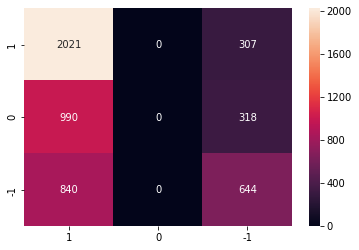

In [107]:
import seaborn as sns
predicted_values_RDF = rf_clf.predict(X_test)

print("score RandomForest Model: ", rf_clf.score(X_test, y_test))
conf_matrix = confusion_matrix(y_test, predicted_values_RDF, labels=[1, 0, -1])

sns.heatmap(conf_matrix,annot=True,fmt='g',xticklabels=["1","0","-1"],yticklabels=["1","0","-1"])



On voit donc qu'on arrive à une précision de 0.5205 en utilisant le randomForest.

## Prise en compte des outliers ou non ?

Dans le rapport précédent, nous n'avons pas pu nous attarder sur les outliers par manque de temps. Pour ce rapport final,nous avons tester d'enlever ou du moins de diminuer le nombre d'outliers pour voir comment cela influait sur le modèle.

In [ ]:
#définition d'une fonction afin de supprimer les outliers
#En se basant sur les graphes boxplots nous pouvons connaitres les outliers en fonction du 1er et 3eme quartile et l'écart interquartile.

def removeOutliers(dataset,feature):
    
    indexing = []
    
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1 #ecart-interquartile
        
    borneSup = Q3 + 1.5 * IQR
    borneInf = Q1 - 1.5 * IQR
    
    
    for index, row in dataset.iterrows():
        if( (row[feature] > borneSup) | (row[feature] < borneInf)) :
            indexing.append(index)
    
    datasetWithoutOutliers = dataset.drop(indexing,axis=0)
    return datasetWithoutOutliers


# Conclusion

En conclusion, nous sommes très content d'avoir fait ce projet. Nous avons pû remarquer que le features engineering avait une très grande place dans le projet.  
Nous nous sommes posé beaucoup de questions car sans connaissance en mathématique et statistique approfondie, nous ne savions pas vraiment vers quel modèle se diriger.   
C'était vraiment la partie embetante du projet, de tout tester en attendant quelque fois 15-20-30 minutes pour qu'un modèle se finisse.